# Exploratory Data Analysis and Hypothesis Testing

This notebook explores the relationship between gaming, sleep duration, and cigarette consumption.

Imports

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


Checking Data If It Loaded

In [2]:
df = pd.read_excel('/content/data(son).xlsx')
df.head()

,Date,Games Played,Game Hours,cigarettes smoked,Sleep Hours
0,2025-03-16,4,2.2,10,7.0
1,2025-03-17,4,2.3,11,6.4
2,2025-03-18,3,1.3,9,7.1
3,2025-03-19,5,2.6,6,8.0
4,2025-03-20,9,4.7,13,6.3


Daily Average Of All Columns

In [6]:
daily_avg = df.groupby("Date")[["Sleep Hours", "Game Hours", "cigarettes smoked"]].mean()


avg_sleep = daily_avg["Sleep Hours"].mean()
avg_game = daily_avg["Game Hours"].mean()
avg_cigs = daily_avg["cigarettes smoked"].mean()

print("AVERAGE PER DAY:")
print(f"Sleep Hours: {avg_sleep:.2f} hours/day")
print(f" Game Hours: {avg_game:.2f} hours/day")
print(f" Cigarettes Smoked: {avg_cigs:.2f} per day")

AVERAGE PER DAY:
Sleep Hours: 6.35 hours/day
 Game Hours: 3.53 hours/day
 Cigarettes Smoked: 7.70 per day


IQR Method For Outlier Detecion

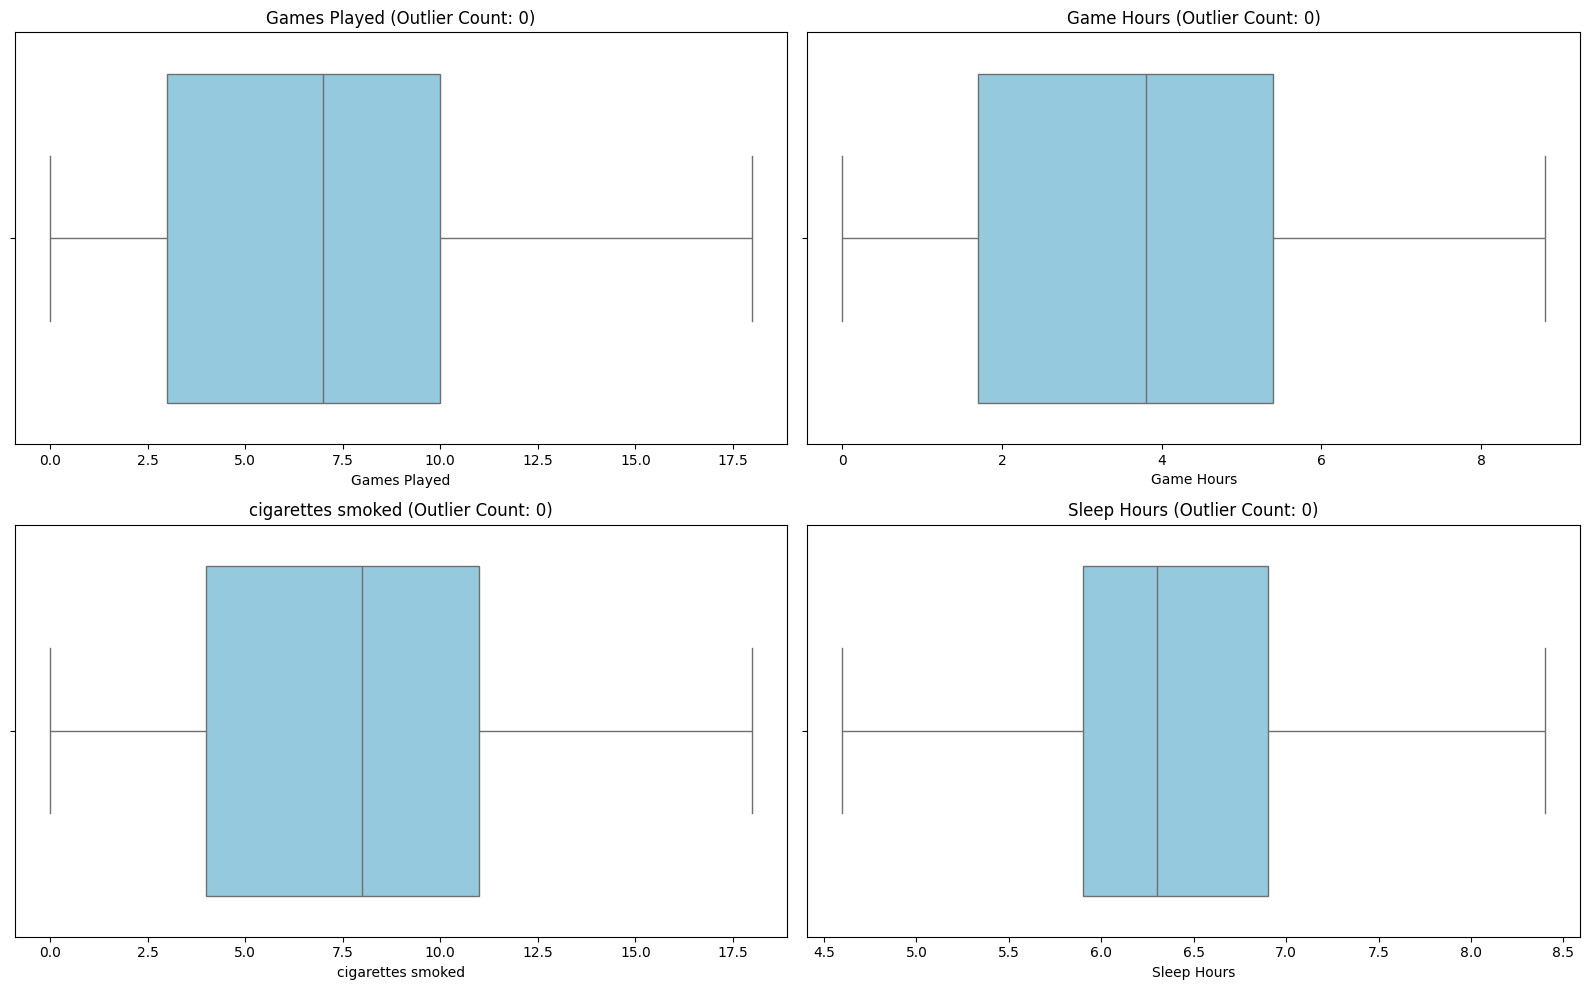


 Games Played summary:
IQR: 7.0
Lower Bound: -7.5
Upper Bound: 20.5
Outlier Count: 0
Outlier Indexes: []

 Game Hours summary:
IQR: 3.7
Lower Bound: -3.8500000000000005
Upper Bound: 10.950000000000001
Outlier Count: 0
Outlier Indexes: []

 cigarettes smoked summary:
IQR: 7.0
Lower Bound: -6.5
Upper Bound: 21.5
Outlier Count: 0
Outlier Indexes: []

 Sleep Hours summary:
IQR: 1.0
Lower Bound: 4.4
Upper Bound: 8.4
Outlier Count: 0
Outlier Indexes: []


In [8]:
outlier_summary = {}
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns, 1):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


    outlier_summary[column] = {
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": len(outliers),
        "Outlier Indexes": outliers.index.tolist()
    }


    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f"{column} (Outlier Count: {len(outliers)})")

plt.tight_layout()
plt.show()


for col, summary in outlier_summary.items():
    print(f"\n {col} summary:")
    for key, value in summary.items():
        print(f"{key}: {value}")

As we can see, the IQR method did not detect any outliers in either the Cigarettes Smoked or Sleep Hours data.

## Correlation Heatmap

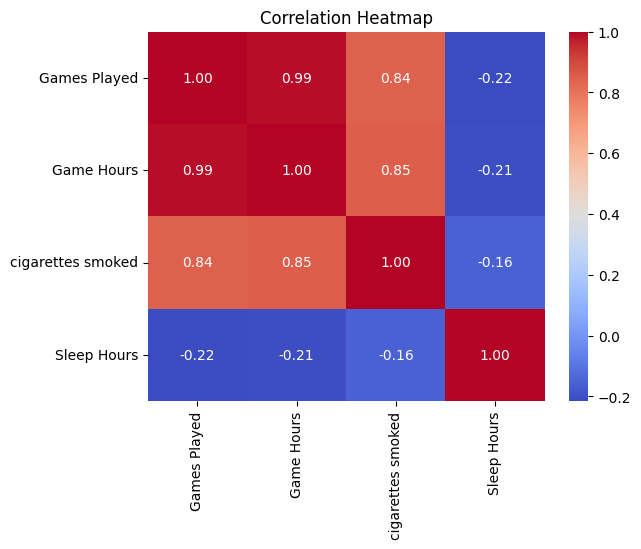

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 Game Hours and Games Played are strongly positively correlated with cigarette consumption and slightly negatively correlated with sleep hours.

## Histogram of Cigarettes Smoked

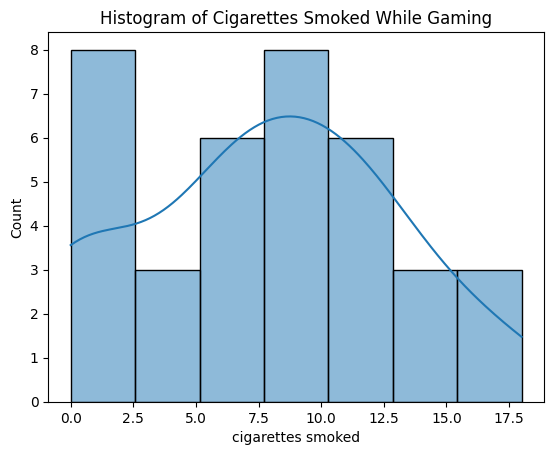

In [10]:
sns.histplot(df['cigarettes smoked'], kde=True)
plt.title('Histogram of Cigarettes Smoked While Gaming')
plt.show()

This graph shows that i have smoked between 0 to 10 cigarettes while gaming, with a peak around 8–10.

## Game Hours vs Cigarettes Smoked

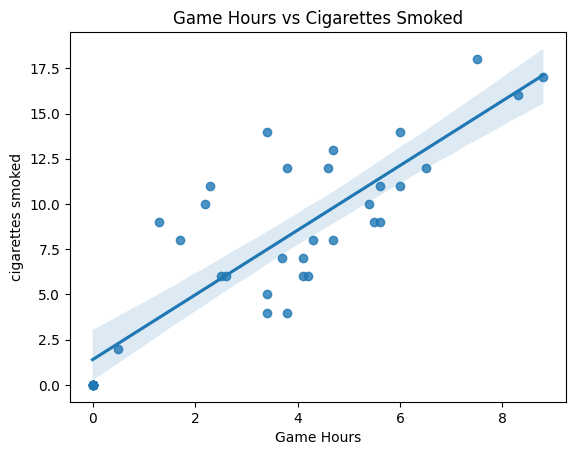

In [11]:
sns.regplot(x='Game Hours', y='cigarettes smoked', data=df)
plt.title('Game Hours vs Cigarettes Smoked')
plt.show()

More gaming hours are associated with a higher number of cigarettes smoked, showing a strong positive correlation.


## Game Hours vs Sleep Hours

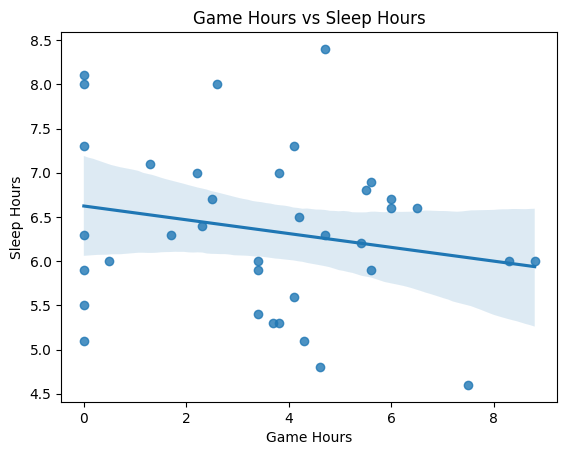

In [12]:
sns.regplot(x='Game Hours', y='Sleep Hours', data=df)
plt.title('Game Hours vs Sleep Hours')
plt.show()

As game hours increase, sleep hours slightly decrease, showing a weak negative correlation.

## Hypothesis 1: Does playing games reduce sleep duration?

In [13]:
corr, p = pearsonr(df['Game Hours'], df['Sleep Hours'])
print(f'Pearson r: {corr:.2f}, p-value: {p:.4g}')
X = sm.add_constant(df['Game Hours'])
model = sm.OLS(df['Sleep Hours'], X).fit()
print(model.summary())

Pearson r: -0.21, p-value: 0.2181
                            OLS Regression Results                            
Dep. Variable:            Sleep Hours   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.573
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.218
Time:                        13:47:47   Log-Likelihood:                -48.374
No. Observations:                  37   AIC:                             100.7
Df Residuals:                      35   BIC:                             104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6

Playing games shows a weak negative correlation with sleep duration (Pearson r = -0.21, p = 0.2181), suggesting that more game hours are slightly linked to less sleep. However, this relationship is not statistically significant in this dataset, so we cannot conclude that gaming reduces sleep duration based on this data alone.

## Hypothesis 2: Does playing more games increase cigarettes smoked while gaming?

In [14]:
corr, p = pearsonr(df['Game Hours'], df['cigarettes smoked'])
print(f'Pearson r: {corr:.2f}, p-value: {p:.4g}')
X = sm.add_constant(df['Game Hours'])
model = sm.OLS(df['cigarettes smoked'], X).fit()
print(model.summary())

Pearson r: 0.85, p-value: 2.629e-11
                            OLS Regression Results                            
Dep. Variable:      cigarettes smoked   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     91.63
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.63e-11
Time:                        13:47:49   Log-Likelihood:                -89.096
No. Observations:                  37   AIC:                             182.2
Df Residuals:                      35   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

Playing more games is strongly and significantly correlated with smoking more cigarettes in this dataset (r = 0.85, p < 0.0000000001).

Regression Analysis And Choosing The Right Regression Model

Preping Data

In [15]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
target_columns = ["cigarettes smoked"]
X_columns = [col for col in numeric_columns if col not in target_columns]

Scaling Data

In [16]:
X = df[X_columns]
y = df["cigarettes smoked"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Define Models And Training Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    rmse = mean_squared_error(y_test, predictions, multioutput='raw_values') ** 0.5
    r2 = r2_score(y_test, predictions, multioutput='raw_values')

results[name] = {
    "Cigarettes Smoked": {"MAE": mae[0], "RMSE": rmse[0], "R2": r2[0]}
}

Displaying Results

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    rmse = mean_squared_error(y_test, predictions, multioutput='raw_values') ** 0.5
    r2 = r2_score(y_test, predictions, multioutput='raw_values')


    results[name] = {
        "Cigarettes Smoked": {
            "MAE": mae[0],
            "RMSE": rmse[0],
            "R2": r2[0]
        }
    }

For Games Played Best Is Random Forest With Smallest RMSE and Highest R2 Score.
For Cigarretes Smoked Best Is Decision Tree with best scores on all 3 metrics.

**Visualisation **

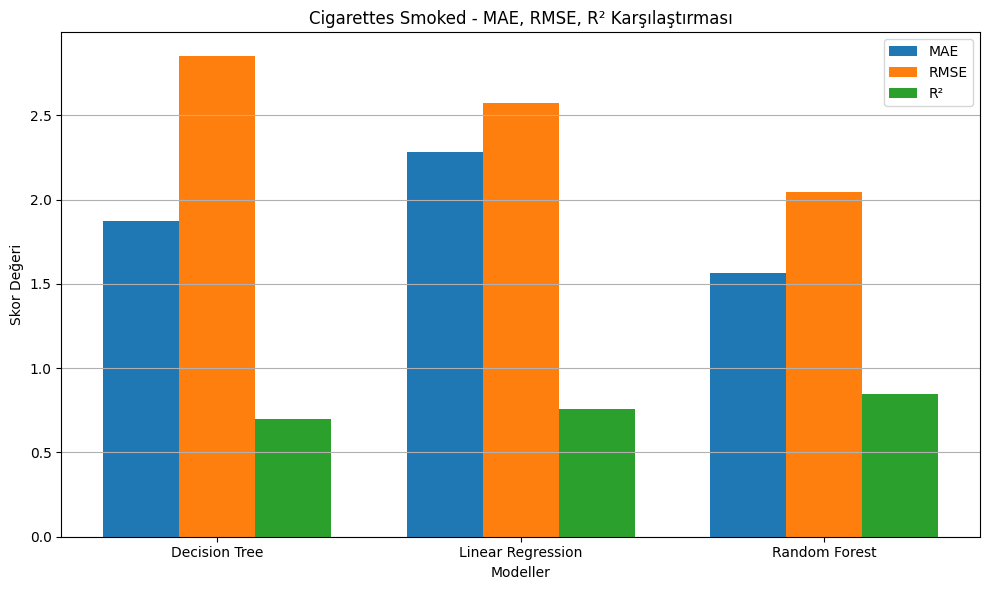

In [23]:


model_names = list(results.keys())


mae_scores = [results[m]["Cigarettes Smoked"]["MAE"] for m in model_names]
rmse_scores = [results[m]["Cigarettes Smoked"]["RMSE"] for m in model_names]
r2_scores = [results[m]["Cigarettes Smoked"]["R2"] for m in model_names]

x = np.arange(len(model_names))
width = 0.25
plt.figure(figsize=(10, 6))


plt.bar(x - width, mae_scores, width, label='MAE')
plt.bar(x, rmse_scores, width, label='RMSE')
plt.bar(x + width, r2_scores, width, label='R²')


plt.xlabel('Modeller')
plt.ylabel('Skor Değeri')
plt.title('Cigarettes Smoked - MAE, RMSE, R² Karşılaştırması')
plt.xticks(x, model_names)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The graph compares three models predicting cigarettes smoked: Decision Tree, Linear Regression, and Random Forest.
Random Forest performs the best with the lowest errors (MAE, RMSE) and the highest R² score.
Linear Regression and Decision Tree are less accurate, with higher error values and lower R².
Overall, Random Forest is the most reliable model among the three.

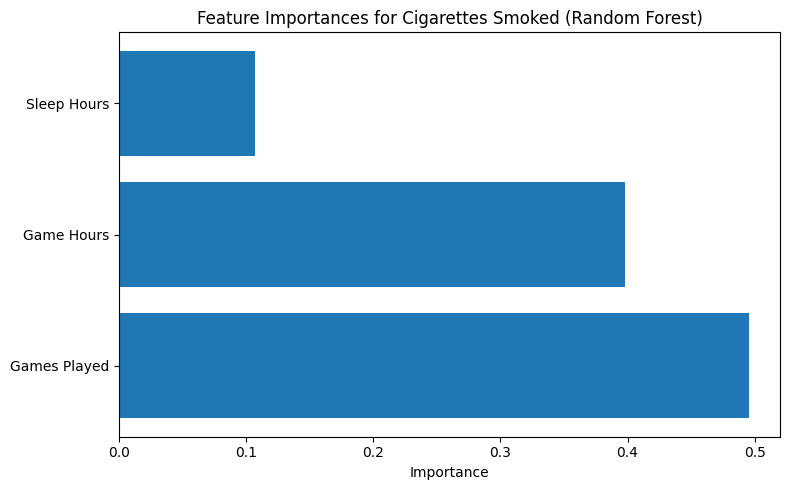

In [24]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importances for Cigarettes Smoked (Random Forest)")
plt.tight_layout()
plt.show()


This graph shows the importance of each feature in predicting cigarette consumption using the Random Forest model.
Games Played is the most influential factor, followed by Game Hours.
Sleep Hours has the least impact on the model’s predictions.
This suggests that how often someone plays matters more than how long they play or how much they sleep.




